# CS 640 - 2025 Fall - Homework 5

In this homework, you will define a Markov decision process describing a cat moving on a 32 x 32 grid looking for a fish.
This will extend last week's Markov reward process by giving the cat agency to seek out the fish.

## Instructions

1. Follow the instructions below to construct and analyze the Markov decision process.
2. Run all the cells so that all the check cells are updated.
3. Answer the question at the bottom.
4. Submit your notebook in Gradescope.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

## State Descriptions

You will construct a Markov decision problem based on the following specification (same as homework 4).
1. The states are numbered from 0 to 1024 (inclusive).
2. The state 1024 is a special done state.
3. For state s from 0 to 1023, the state number encodes coordinates as follows.
  * x = s % 32
  * y = s / 32 (integer division)
  * x and y represent the location of a cat in a 32x32 grid.
4. At the state corresponding to x=16,y=16, there is a fish unless the cat is also there.

The following function `print_state` will visualize the state.

In [2]:
def print_state(s):
    assert 0 <= s <= 1024

    print("STATE", s)

    if s < 1024:
        # normal state indicating y, x coordinates
        output = ['🪨' for _ in range(1024)]
        output[16*32+16] = '🐟'
        output[s] = '🐱'
        for i in range(0, 1024, 32):
            print(''.join(output[i:i+32]))
    else:
        print("DONE")

    print("")

for s in (0, 2 * 32 + 5, 16*32+16, 1023, 1024):
    print_state(s)

STATE 0
🐱🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🐟🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨🪨
🪨🪨

## Actions

In any state, the cat will have 4 possible actions.
1. Up. The cat tries to change its $y$ coordinate by -1.
2. Down. The cat tries to change its $y$ coordinate by +1.
3. Left. The cat tries to change its $x$ coordinate by -1.
4. Right. The cat tries to change its $x$ coordinate by +1.

If the up/down descriptions do not make sense, consider that the first row when printing corresponds to $y=0$ and the last row printed corresponds to $y=31$.

## State Transitions

For each action $a$, construct a transition matrix $P_a$ based on the following rules.

1. $P_a$ should be 1025x1025.
2. $P_a[i,j]$ should hold the probability of transitioning from state i to j in one step.
3. If the state is 1024 (the done state), the state stays the same with probability 1.
4. If the state is 528 (cat is on the fish), the state changes to 1024 with probability 1.
5. If the action $a$ corresponds to moving off the grid, then the state stays the same with probability 1.
6. Otherwise, for any other state $s$,
    * For any state $s'$ representing locations that are adjacent horizontally or vertically besides the state that the cat intends to reach, there is a 5% of transitioning from $s$ to $s'$.
    * The state to which the cat intends to move has the remaining probability (this should be 0.85, 0.90 or 0.95).
    * The probability of transitioning to a state representing a non-adjacent location is zero.


In [3]:
# YOUR CHANGES HERE

def get_coords(s):
    if s == 1024:
        return -1, -1  # Indicates the done state
    x = s % 32
    y = s // 32
    return x, y

def get_state(x, y):
    if 0 <= x < 32 and 0 <= y < 32:
        return y * 32 + x
    return -1 # Indicates out of bounds

N_STATES = 1025
P = {}

actions = ["up", "down", "left", "right"]

for action in actions:
    P[action] = np.zeros((N_STATES, N_STATES))

    for s in range(N_STATES):
        if s == 1024:  # Done state
            P[action][s, s] = 1.0
            continue
        if s == 16 * 32 + 16:  # Cat on fish
            P[action][s, 1024] = 1.0
            continue

        x, y = get_coords(s)
        next_x, next_y = x, y

        if action == "up":
            next_y -= 1
        elif action == "down":
            next_y += 1
        elif action == "left":
            next_x -= 1
        elif action == "right":
            next_x += 1

        next_state = get_state(next_x, next_y)

        if next_state == -1:  # Move off the grid
            P[action][s, s] = 1.0
        else:
            # Intended move
            intended_state = next_state
            P[action][s, intended_state] = 0.95

            # Adjacent moves
            adjacent_moves = []
            # up
            if action != "down":
                adj_state = get_state(x, y - 1)
                if adj_state != -1 and adj_state != intended_state:
                    adjacent_moves.append(adj_state)
            # down
            if action != "up":
                adj_state = get_state(x, y + 1)
                if adj_state != -1 and adj_state != intended_state:
                    adjacent_moves.append(adj_state)
            # left
            if action != "right":
                adj_state = get_state(x - 1, y)
                if adj_state != -1 and adj_state != intended_state:
                     adjacent_moves.append(adj_state)
            # right
            if action != "left":
                adj_state = get_state(x + 1, y)
                if adj_state != -1 and adj_state != intended_state:
                     adjacent_moves.append(adj_state)


            prob_adjacent = 0.05 / len(adjacent_moves) if len(adjacent_moves) > 0 else 0
            for adj_state in adjacent_moves:
                P[action][s, adj_state] += prob_adjacent

            # Adjust probability for intended state based on the number of adjacent moves
            P[action][s, intended_state] = 1.0 - prob_adjacent * len(adjacent_moves)


# Check transition probabilities sum to 1
for action in actions:
    for s in range(N_STATES):
        assert abs(np.sum(P[action][s]) - 1.0) < 1e-9, f"Probabilities do not sum to 1 for state {s} and action {action}"

## State Rewards

Construct a reward vector R based on the following rules.
The reward does not depend on the action.

1. R should be 1025x1.
2. R[i] should hold the reward after state i.
3. The reward after state 528 (cat is on fish) is 100.
4. The reward for all other states is 0.

In [4]:
# YOUR CHANGES HERE

R = np.zeros(N_STATES)
R[16 * 32 + 16] = 100

## Optimal State Values

Use **value iteration** to compute the value function $v_*$ for each state using $\gamma=0.9$ and save it in $v$.

In [5]:
# YOUR CHANGES HERE

gamma = 0.9
v = np.zeros(N_STATES)
theta = 1e-6  # convergence threshold

while True:
    delta = 0
    for s in range(N_STATES):
        v_prev = v[s]
        v_new = -float('inf')  # Initialize with negative infinity

        if s == 1024:  # Done state
            v_new = 0
        else:
            for action in actions:
                q_sa = np.sum(P[action][s] * (R + gamma * v))
                v_new = max(v_new, q_sa)

        delta = max(delta, abs(v_prev - v_new))
        v[s] = v_new

    if delta < theta:
        break

v = v.tolist() # Convert back to list for consistency with previous cell output

### Check $v_*$ values.

Run these cells without changing their code.

In [6]:
# done state
v[1024]

0.0

In [7]:
# cat arrived at fish
v[528]

0.0

In [8]:
# cat next to fish
v[529]

98.98920766801504

In [9]:
# cat farther from fish
v[530]

88.20783167723235

## Visualize $v_*$.

Run this cell without changing its code.

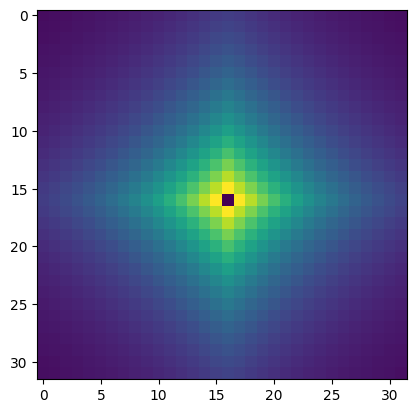

In [10]:
plt.imshow(np.asarray(v)[:1024].reshape(32, 32));

## Optimal State-Action Values

Use **q-learning** to compute the state-action value function $q_*$ using $\gamma$ and save it in `q`.
`q` should be constructed so that `q[s][a]` returns the value $q_*(s,a)$ where $s$ is an integer from 0 to 1024 (inclusive) and $a$ is one of the strings "up", "down", "left" or "right".

In [11]:
# YOUR CHANGES HERE

q = {}
for s in range(N_STATES):
    q[s] = {}
    if s == 1024: # Done state
        for action in actions:
            q[s][action] = 0.0
    else:
        for action in actions:
            q[s][action] = np.sum(P[action][s] * (R + gamma * np.array(v)))

### Check $q_*$ values.

Run these cells without changing their code.

In [12]:
# done state

(q[1024]["up"], q[1024]["down"], q[1024]["left"], q[1024]["right"])

(0.0, 0.0, 0.0, 0.0)

In [13]:
# cat arrived at fish

(q[528]["up"], q[528]["down"], q[528]["left"], q[528]["right"])

(np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0))

In [14]:
# cat next to fish

(q[529]["up"], q[529]["down"], q[529]["left"], q[529]["right"])

(np.float64(80.27962190502333),
 np.float64(80.27962190502333),
 np.float64(98.98920766801504),
 np.float64(79.40690375204869))

In [15]:
# cat farther from fish

(q[530]["up"], q[530]["down"], q[530]["left"], q[530]["right"])

(np.float64(71.86523738297623),
 np.float64(71.86523738297623),
 np.float64(88.20783167723235),
 np.float64(70.78862169862722))

## Extract Optimal Policy from $q_*$.

Construct an optimal policy based on $q_*$.
Save it in a variable `pi`

In [22]:
# YOUR CHANGES HERE

pi = []
for s in range(N_STATES):
    if s == 1024: # Done state
        pi.append("done") # or any other indicator for the done state
    else:
        best_action = None
        max_q = -float('inf')
        for action in actions:
            if q[s][action] > max_q:
                max_q = q[s][action]
                best_action = action
        pi.append(best_action)

### Check $\pi$ values

Run these cells without changing their code.

In [23]:
# done state
pi[1024]

'done'

In [24]:
# cat arrived at fish
pi[528]

'up'

In [25]:
# cat next to fish
pi[529]

'left'

In [26]:
# cat farther from fish
pi[530]

'left'

## Visualize $\pi$.

Run this cell without changing its code.

In [27]:
pi_visualized = ["🔥" for _ in range(1024)]

for i in range(1024):
    if pi[i] == "up":
        pi_visualized[i] = "⬆️"
    elif pi[i] == "down":
        pi_visualized[i] = "⬇️"
    elif pi[i] == "left":
        pi_visualized[i] = "⬅️"
    elif pi[i] == "right":
        pi_visualized[i] = "➡️"
    else:
        raise Exception(f"Unknown action : {pi[i]!r}")

pi_visualized[16*32+16] = '🐟'

for i in range(0, 1024, 32):
    print(''.join(pi_visualized[i:i+32]))

➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬇️
⬇️⬇️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬇️⬇️
⬇️⬇️⬇️➡️➡️➡️➡️➡️➡️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬇️⬇️⬇️
⬇️⬇️⬇️⬇️➡️➡️➡️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬅️⬅️⬅️⬅️⬅️⬇️⬇️⬇️⬇️
⬇️⬇️⬇️⬇️➡️➡️➡️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬅️⬅️⬅️⬅️⬇️⬇️⬇️⬇️⬇️
⬇️⬇️⬇️⬇️⬇️⬇️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬅️⬅️⬇️⬇️⬇️⬇️⬇️⬇️
⬇️⬇️⬇️⬇️⬇️⬇️⬇️➡️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️
⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️
⬇️⬇️⬇️⬇️⬇️⬇️➡️➡️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬅️⬇️⬇️⬇️⬇️⬇️⬇️
⬇️⬇️⬇️⬇️⬇️➡️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬅️⬅️⬅️⬇️⬇️⬇️⬇️⬇️
⬇️⬇️⬇️➡️➡️➡️➡️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬅️⬅️⬅️⬅️⬅️⬇️⬇️⬇️⬇️
⬇️⬇️⬇️➡️➡️➡️➡️➡️➡️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬇️⬇️⬇️
⬇️⬇️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬇️⬇️
⬇️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬇️
➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️⬇️⬇️⬇️⬇️⬇️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️⬅️
➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡